In [1]:
import sklearn
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 4\Salary_Data.csv")
data.head(6)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


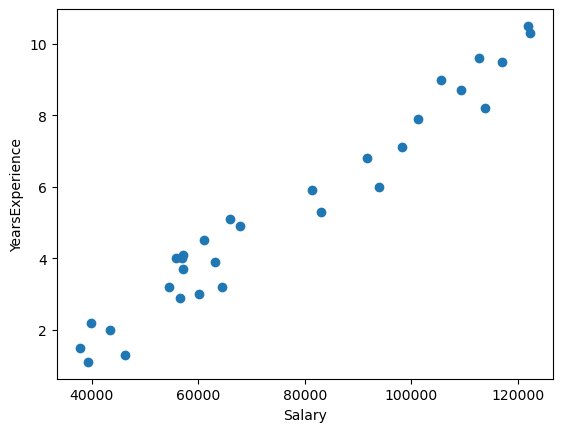

In [13]:
import matplotlib.pyplot as plt
plt.scatter(data['Salary'], data['YearsExperience'])
plt.xlabel('Salary')
plt.ylabel('YearsExperience')
plt.show()

In [5]:
model = smf.ols("YearsExperience~Salary", data = data).fit()

In [6]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        00:13:06   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

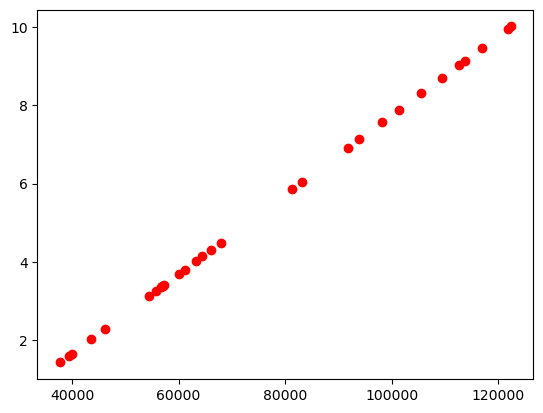

In [16]:
plt.scatter(data['Salary'], model1.predict(data['Salary']), label='Model 1 Predictions', color='red')

In [8]:
model1 = smf.ols("YearsExperience~Salary", data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        00:13:07   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
data["Salary_sq"] = data.Salary**2
model2 = smf.ols("np.log(YearsExperience)~Salary+Salary_sq", data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.907
Model:                                 OLS   Adj. R-squared:                  0.901
Method:                      Least Squares   F-statistic:                     132.3
Date:                     Fri, 01 Dec 2023   Prob (F-statistic):           1.12e-14
Time:                             00:13:07   Log-Likelihood:                 7.7666
No. Observations:                       30   AIC:                            -9.533
Df Residuals:                           27   BIC:                            -5.330
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5369      0.381     -4.036      0.000      -2.318      -0.755
Salary      6.153e-05   1.03e-05      5.951      0.000    4.03e-05    8.27e-05
Salary_sq  -2.514e-10   6.37e-11     -3.949      0.001   -3.82e-10   -1.21e-10
==============================================================================
Omnibus:                        3.765   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.504
Skew:                          -0.687   Prob(JB):                        0.286
Kurtosis:                       3.340   Cond. No.                     8.31e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""